## 1. 前置動作

In [ ]:
# Download from Google Drive
!gdown --id 1Y2gYY8XUWgcIA_GbytBuXoRkLlAWxnAFc

!unzip project1_indian_liver_patient.zip
# if seeing the message: "replace project1_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:"
# you may enter "A"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y2gYY8XUWgcIA_GbytBuXoRkLlAWxnAF
To: /content/project1_indian_liver_patient.zip
100% 8.37k/8.37k [00:00<00:00, 7.55MB/s]
Archive:  project1_indian_liver_patient.zip
  inflating: project1_test.csv       
  inflating: project1_train.csv      


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import resample

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('project1_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         467 non-null    int64  
 1   Gender                      467 non-null    object 
 2   Total_Bilirubin             467 non-null    float64
 3   Direct_Bilirubin            467 non-null    float64
 4   Alkaline_Phosphotase        467 non-null    int64  
 5   Alamine_Aminotransferase    467 non-null    int64  
 6   Aspartate_Aminotransferase  467 non-null    int64  
 7   Total_Protiens              467 non-null    float64
 8   Albumin                     467 non-null    float64
 9   Albumin_and_Globulin_Ratio  463 non-null    float64
 10  Label                       467 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 40.3+ KB


## 2. 圖表分析

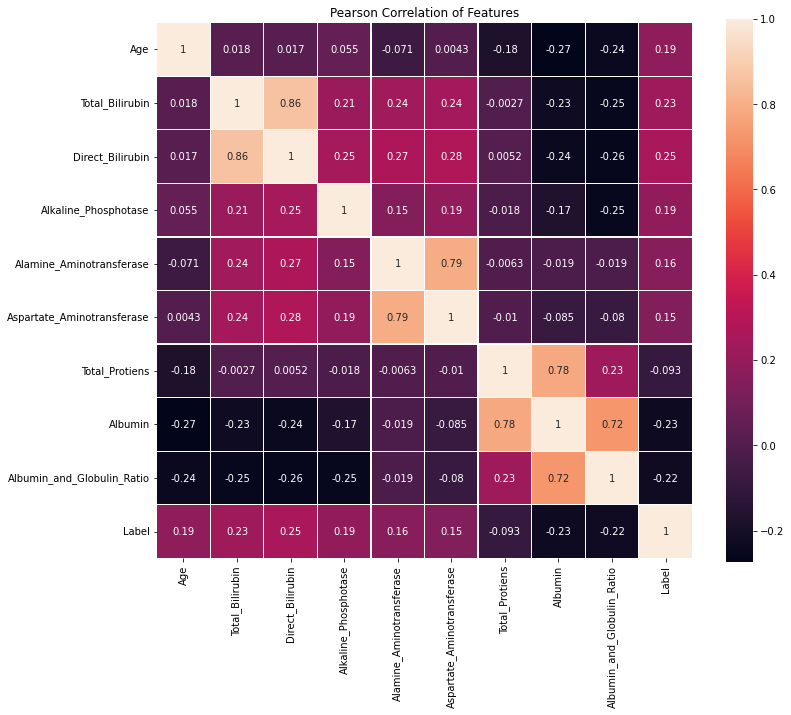

In [ ]:
# 畫出熱力圖
plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
sns.heatmap(df.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.show()

new_df = df.drop(['Total_Bilirubin', 'Alamine_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio', 'Gender', 'Label'], axis = 1)

In [ ]:
new_df.columns

Index(['Age', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Aspartate_Aminotransferase', 'Albumin'],
      dtype='object')

Age 偏度(Skewness): -0.11 峰度(Kurtosis): -0.57


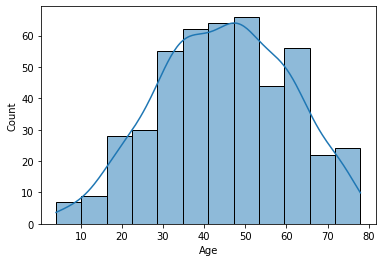

In [ ]:
# 查看各資料的偏度和峰度
plt.figsize = (10, 30)

skewness = round(new_df['Age'].skew(), 2)
kurtosis = round(new_df['Age'].kurt(), 2)

print('Age 偏度(Skewness):',skewness, '峰度(Kurtosis):',kurtosis)

sns.histplot(new_df['Age'], kde = True)
plt.show()

Direct_Bilirubin 偏度(Skewness): 3.17 峰度(Kurtosis): 11.06


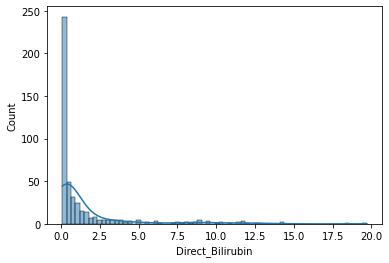

In [ ]:
plt.figsize = (10, 30)

skewness = round(new_df['Direct_Bilirubin'].skew(), 2)
kurtosis = round(new_df['Direct_Bilirubin'].kurt(), 2)

print('Direct_Bilirubin 偏度(Skewness):',skewness, '峰度(Kurtosis):',kurtosis)

sns.histplot(new_df['Direct_Bilirubin'], kde = True)
plt.show()

Alkaline_Phosphotase 偏度(Skewness): 3.8 峰度(Kurtosis): 18.36


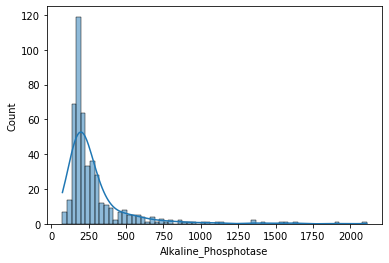

In [ ]:
plt.figsize = (10, 30)

skewness = round(new_df['Alkaline_Phosphotase'].skew(), 2)
kurtosis = round(new_df['Alkaline_Phosphotase'].kurt(), 2)

print('Alkaline_Phosphotase 偏度(Skewness):',skewness, '峰度(Kurtosis):',kurtosis)

sns.histplot(new_df['Alkaline_Phosphotase'], kde = True)
plt.show()

Alamine_Aminotransferase 偏度(Skewness): 6.96 峰度(Kurtosis): 58.87


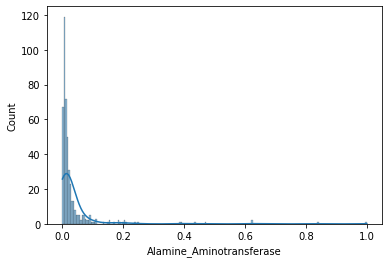

In [ ]:
plt.figsize = (10, 30)

skewness = round(new_df['Alamine_Aminotransferase'].skew(), 2)
kurtosis = round(new_df['Alamine_Aminotransferase'].kurt(), 2)

print('Alamine_Aminotransferase 偏度(Skewness):',skewness, '峰度(Kurtosis):',kurtosis)

sns.histplot(new_df['Alamine_Aminotransferase'], kde = True)
plt.show()

Aspartate_Aminotransferase 偏度(Skewness): 10.74 峰度(Kurtosis): 148.68


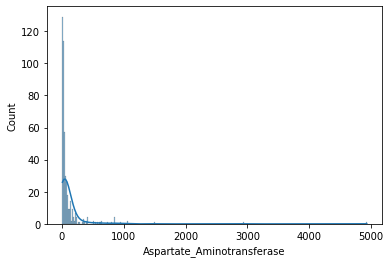

In [ ]:
plt.figsize = (10, 30)

skewness = round(new_df['Aspartate_Aminotransferase'].skew(), 2)
kurtosis = round(new_df['Aspartate_Aminotransferase'].kurt(), 2)

print('Aspartate_Aminotransferase 偏度(Skewness):',skewness, '峰度(Kurtosis):',kurtosis)

sns.histplot(new_df['Aspartate_Aminotransferase'], kde = True)
plt.show()

Albumin 偏度(Skewness): -0.01 峰度(Kurtosis): -0.34


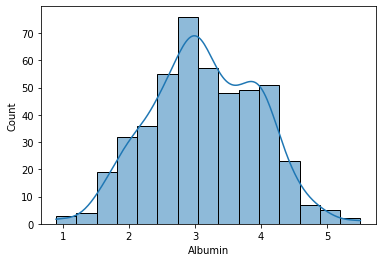

In [ ]:
plt.figsize = (10, 30)

skewness = round(new_df['Albumin'].skew(), 2)
kurtosis = round(new_df['Albumin'].kurt(), 2)

print('Albumin 偏度(Skewness):',skewness, '峰度(Kurtosis):',kurtosis)

sns.histplot(new_df['Albumin'], kde = True)
plt.show()

## 3. 前處理

In [ ]:
#前處理 二號 嘗試調整偏度
def pre_processing2(data) :

  dropna_Data = data.dropna()
  dropna_Data = dropna_Data.reset_index()
  dropna_Data = dropna_Data.drop(['index'], axis = 1)

  le = LabelEncoder()
  gender_to_number = le.fit_transform(dropna_Data['Gender'])
  ohe = OneHotEncoder(sparse = False)
  gender_reshape = gender_to_number.reshape(len(dropna_Data), 1) 
  new_gender = ohe.fit_transform(gender_reshape)

  mmsc = MinMaxScaler()
  alkphos_array = dropna_Data['Alkaline_Phosphotase'].values
  alkphos_array_reshape = alkphos_array.reshape(len(dropna_Data), 1)
  db_array = dropna_Data['Direct_Bilirubin'].values
  db_array_reshape = db_array.reshape(len(dropna_Data), 1)
  sgot_array = dropna_Data['Aspartate_Aminotransferase'].values
  sgot_array_reshape = sgot_array.reshape(len(dropna_Data), 1)

  alkphos_standard = mmsc.fit_transform(alkphos_array_reshape)
  db_standard = mmsc.fit_transform(db_array_reshape)
  sgot_standard = mmsc.fit_transform(sgot_array_reshape)

  new_data = pd.concat([dropna_Data.drop(['Gender', 'Alkaline_Phosphotase', 'Direct_Bilirubin', 'Aspartate_Aminotransferase'], axis = 1), 
                        pd.DataFrame(new_gender, columns = ['Male_gender', 'Female_gender']),
                        pd.DataFrame(alkphos_standard, columns = ['Alkaline_Phosphotase']), 
                        pd.DataFrame(db_standard, columns = ['Direct_Bilirubin']),
                        pd.DataFrame(sgot_standard, columns = ['Aspartate_Aminotransferase'])], axis = 1)
  return new_data

In [ ]:
dropna_Data = df.dropna()
dropna_Data = dropna_Data.reset_index()
dropna_Data = dropna_Data.drop(['index'], axis = 1)

negative = dropna_Data[dropna_Data.Label==0]
positive = dropna_Data[dropna_Data.Label==1]
negative_Sample = resample(negative, replace=True, n_samples=positive.shape[0])
negative_Sample = negative_Sample.reset_index()
negative_Sample = negative_Sample.drop(['index'], axis = 1)
dropna_Data = pd.concat([positive, negative_Sample], axis = 0, ignore_index = True)

print(negative_Sample.shape)
print(positive.shape)

dropna_Data

(331, 11)
(331, 11)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
1,78,Male,1.0,0.3,152,28,70,6.3,3.1,0.90,1
2,60,Male,2.0,0.8,190,45,40,6.0,2.8,0.80,1
3,75,Male,10.6,5.0,562,37,29,5.1,1.8,0.50,1
4,19,Female,0.7,0.2,186,166,397,5.5,3.0,1.20,1
...,...,...,...,...,...,...,...,...,...,...,...
657,21,Male,1.0,0.3,142,27,21,6.4,3.5,1.20,0
658,38,Female,0.7,0.1,152,90,21,7.1,4.2,1.40,0
659,22,Male,0.8,0.2,300,57,40,7.9,3.8,0.90,0
660,27,Male,1.0,0.3,180,56,111,6.8,3.9,1.85,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
#前處理(將字串轉為數字，以利機器進行訓練測試) 三號 重新採樣 舊方法
def pre_processing3(data):

  dropna_Data = data.dropna()
  dropna_Data = dropna_Data.reset_index()
  dropna_Data = dropna_Data.drop(['index'], axis = 1)

  negative = dropna_Data[dropna_Data.Label==0]
  positive = dropna_Data[dropna_Data.Label==1]
  negative_Sample = resample(negative, replace=True, n_samples=positive.shape[0])
  negative_Sample = negative_Sample.reset_index()
  negative_Sample = negative_Sample.drop(['index'], axis = 1)
  dropna_Data = pd.concat([positive, negative_Sample], axis = 0, ignore_index = True)

  le = LabelEncoder()
  gender_to_number = le.fit_transform(dropna_Data['Gender'])
  ohe = OneHotEncoder(sparse = False)
  gender_reshape = gender_to_number.reshape(len(dropna_Data), 1) 
  new_gender = ohe.fit_transform(gender_reshape)

  mmsc = MinMaxScaler()
  alkphos_array = dropna_Data['Alkaline_Phosphotase'].values
  alkphos_array_reshape = alkphos_array.reshape(len(dropna_Data), 1)
  sgpt_array = dropna_Data['Alamine_Aminotransferase'].values
  sgpt_array_reshape = sgpt_array.reshape(len(dropna_Data), 1)
  sgot_array = dropna_Data['Aspartate_Aminotransferase'].values
  sgot_array_reshape = sgot_array.reshape(len(dropna_Data), 1)

  alkphos_standard = mmsc.fit_transform(alkphos_array_reshape)
  sgpt_standard = mmsc.fit_transform(sgpt_array_reshape)
  sgot_standard = mmsc.fit_transform(sgot_array_reshape)

  new_data = pd.concat([dropna_Data.drop(['Gender', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase'], axis = 1), 
                        pd.DataFrame(new_gender, columns = ['Male_gender', 'Female_gender']),
                        pd.DataFrame(alkphos_standard, columns = ['Alkaline_Phosphotase']), 
                        pd.DataFrame(sgpt_standard, columns = ['Alamine_Aminotransferase']),
                        pd.DataFrame(sgot_standard, columns = ['Aspartate_Aminotransferase'])], axis = 1)
  return new_data

def pre_processing4(data):

  dropna_Data = data.dropna()
  dropna_Data = dropna_Data.reset_index()
  dropna_Data = dropna_Data.drop(['index'], axis = 1) 

  le = LabelEncoder()
  gender_to_number = le.fit_transform(dropna_Data['Gender'])
  ohe = OneHotEncoder(sparse = False)
  gender_reshape = gender_to_number.reshape(len(dropna_Data), 1) 
  new_gender = ohe.fit_transform(gender_reshape)

  mmsc = MinMaxScaler()
  alkphos_array = dropna_Data['Alkaline_Phosphotase'].values
  alkphos_array_reshape = alkphos_array.reshape(len(dropna_Data), 1)
  sgpt_array = dropna_Data['Alamine_Aminotransferase'].values
  sgpt_array_reshape = sgpt_array.reshape(len(dropna_Data), 1)
  sgot_array = dropna_Data['Aspartate_Aminotransferase'].values
  sgot_array_reshape = sgot_array.reshape(len(dropna_Data), 1)

  alkphos_standard = mmsc.fit_transform(alkphos_array_reshape)
  sgpt_standard = mmsc.fit_transform(sgpt_array_reshape)
  sgot_standard = mmsc.fit_transform(sgot_array_reshape)

  new_data = pd.concat([dropna_Data.drop(['Gender', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase'], axis = 1), 
                        pd.DataFrame(new_gender, columns = ['Male_gender', 'Female_gender']),
                        pd.DataFrame(alkphos_standard, columns = ['Alkaline_Phosphotase']), 
                        pd.DataFrame(sgpt_standard, columns = ['Alamine_Aminotransferase']),
                        pd.DataFrame(sgot_standard, columns = ['Aspartate_Aminotransferase'])], axis = 1)
  return new_data

In [ ]:
#前處理(將字串轉為數字，以利機器進行訓練測試) 三號 重新採樣 新方法
def pre_processing3(data):

  dropna_Data = data.dropna()
  dropna_Data = dropna_Data.reset_index()
  dropna_Data = dropna_Data.drop(['index'], axis = 1)

  negative = dropna_Data[dropna_Data.Label==0]
  positive = dropna_Data[dropna_Data.Label==1]
  negative_Sample = resample(negative, replace=True, n_samples=positive.shape[0])
  negative_Sample = negative_Sample.reset_index()
  negative_Sample = negative_Sample.drop(['index'], axis = 1)
  dropna_Data = pd.concat([positive, negative_Sample], axis = 0, ignore_index = True)

  le = LabelEncoder()
  gender_to_number = le.fit_transform(dropna_Data['Gender'])
  ohe = OneHotEncoder(sparse = False)
  gender_reshape = gender_to_number.reshape(len(dropna_Data), 1) 
  new_gender = ohe.fit_transform(gender_reshape)

  mmsc = MinMaxScaler()
  alkphos_array = dropna_Data['Alkaline_Phosphotase'].values
  alkphos_array_reshape = alkphos_array.reshape(len(dropna_Data), 1)
  sgpt_array = dropna_Data['Alamine_Aminotransferase'].values
  sgpt_array_reshape = sgpt_array.reshape(len(dropna_Data), 1)
  sgot_array = dropna_Data['Aspartate_Aminotransferase'].values
  sgot_array_reshape = sgot_array.reshape(len(dropna_Data), 1)

  alkphos_standard = mmsc.fit_transform(alkphos_array_reshape)
  sgpt_standard = mmsc.fit_transform(sgpt_array_reshape)
  sgot_standard = mmsc.fit_transform(sgot_array_reshape)

  new_data = pd.concat([dropna_Data.drop(['Gender', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase'], axis = 1), 
                        pd.DataFrame(new_gender, columns = ['Male_gender', 'Female_gender']),
                        pd.DataFrame(alkphos_standard, columns = ['Alkaline_Phosphotase']), 
                        pd.DataFrame(sgpt_standard, columns = ['Alamine_Aminotransferase']),
                        pd.DataFrame(sgot_standard, columns = ['Aspartate_Aminotransferase'])], axis = 1)
  return new_data

def pre_processing4(data):

  dropna_Data = data.dropna()
  dropna_Data = dropna_Data.reset_index()
  dropna_Data = dropna_Data.drop(['index'], axis = 1) 

  le = LabelEncoder()
  gender_to_number = le.fit_transform(dropna_Data['Gender'])
  ohe = OneHotEncoder(sparse = False)
  gender_reshape = gender_to_number.reshape(len(dropna_Data), 1) 
  new_gender = ohe.fit_transform(gender_reshape)

  mmsc = MinMaxScaler()
  alkphos_array = dropna_Data['Alkaline_Phosphotase'].values
  alkphos_array_reshape = alkphos_array.reshape(len(dropna_Data), 1)
  sgpt_array = dropna_Data['Alamine_Aminotransferase'].values
  sgpt_array_reshape = sgpt_array.reshape(len(dropna_Data), 1)
  sgot_array = dropna_Data['Aspartate_Aminotransferase'].values
  sgot_array_reshape = sgot_array.reshape(len(dropna_Data), 1)

  alkphos_standard = mmsc.fit_transform(alkphos_array_reshape)
  sgpt_standard = mmsc.fit_transform(sgpt_array_reshape)
  sgot_standard = mmsc.fit_transform(sgot_array_reshape)

  new_data = pd.concat([dropna_Data.drop(['Gender', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase'], axis = 1), 
                        pd.DataFrame(new_gender, columns = ['Male_gender', 'Female_gender']),
                        pd.DataFrame(alkphos_standard, columns = ['Alkaline_Phosphotase']), 
                        pd.DataFrame(sgpt_standard, columns = ['Alamine_Aminotransferase']),
                        pd.DataFrame(sgot_standard, columns = ['Aspartate_Aminotransferase'])], axis = 1)
  return new_data

In [ ]:
#前處理並且將其包裝成函式，這樣要處理資料直接帶入函式就好，不必再將整個前處理程式碼複製過去(主要採納的前處理)
def pre_processing(data) :

  #將缺失值丟去
  dropna_Data = data.dropna()
  dropna_Data = dropna_Data.reset_index()
  dropna_Data = dropna_Data.drop(['index'], axis = 1)

  #將 Gender 轉換乘數字，以利機器去做學習
  le = LabelEncoder()
  gender_to_number = le.fit_transform(dropna_Data['Gender'])
  ohe = OneHotEncoder(sparse = False)
  gender_reshape = gender_to_number.reshape(len(dropna_Data), 1) 
  new_gender = ohe.fit_transform(gender_reshape)

  #把數字範圍很大的欄位做最小最大標準化處理
  mmsc = MinMaxScaler()
  alkphos_array = dropna_Data['Alkaline_Phosphotase'].values
  alkphos_array_reshape = alkphos_array.reshape(len(dropna_Data), 1)
  sgpt_array = dropna_Data['Alamine_Aminotransferase'].values
  sgpt_array_reshape = sgpt_array.reshape(len(dropna_Data), 1)
  sgot_array = dropna_Data['Aspartate_Aminotransferase'].values
  sgot_array_reshape = sgot_array.reshape(len(dropna_Data), 1)

  alkphos_standard = mmsc.fit_transform(alkphos_array_reshape)
  sgpt_standard = mmsc.fit_transform(sgpt_array_reshape)
  sgot_standard = mmsc.fit_transform(sgot_array_reshape)

  #將以上處理過的資料進行彙整
  new_data = pd.concat([dropna_Data.drop(['Gender', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase'], axis = 1), 
                        pd.DataFrame(new_gender, columns = ['Male_gender', 'Female_gender']),
                        pd.DataFrame(alkphos_standard, columns = ['Alkaline_Phosphotase']), 
                        pd.DataFrame(sgpt_standard, columns = ['Alamine_Aminotransferase']),
                        pd.DataFrame(sgot_standard, columns = ['Aspartate_Aminotransferase'])], axis = 1)
  return new_data

## 4. 模型訓練

In [ ]:
#套用前處理的函示
new_df = pre_processing(df)

#設定X，Y值
X = new_df.drop(['Label', 'Total_Protiens', 'Albumin_and_Globulin_Ratio'], axis = 1)
y = new_df['Label']

#將資料進行分割，分成訓練集和驗證集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)
X

,Age,Total_Bilirubin,Direct_Bilirubin,Albumin,Male_gender,Female_gender,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase
0,40,0.9,0.3,3.1,1.0,0.0,0.107125,0.111558,0.047774
1,78,1.0,0.3,3.1,0.0,1.0,0.037838,0.009045,0.012198
2,60,2.0,0.8,2.8,0.0,1.0,0.056511,0.017588,0.006099
3,75,10.6,5.0,1.8,0.0,1.0,0.239312,0.013568,0.003863
4,19,0.7,0.2,3.0,1.0,0.0,0.054545,0.078392,0.078675
...,...,...,...,...,...,...,...,...,...
458,32,0.7,0.2,2.9,0.0,1.0,0.098771,0.046231,0.036593
459,58,0.8,0.2,4.4,0.0,1.0,0.051597,0.011055,0.003049
460,34,5.9,2.5,2.7,0.0,1.0,0.105651,0.017588,0.045334
461,36,0.8,0.2,3.8,0.0,1.0,0.052580,0.010553,0.004879


In [ ]:
#使用決策樹分類器
tree = DecisionTreeClassifier()
param_grid = {'max_depth' : [3, 4, 5], 'criterion' : ['gini', 'entropy'], 'min_samples_split' : [2, 3, 4, 5], 'min_samples_leaf' : [2, 3, 4, 5]}

cv = GridSearchCV(tree, param_grid = param_grid, cv = 10)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_val)

print(classification_report(y_val, y_pred))
print(cv.best_params_)

              precision    recall  f1-score   support

           0       0.43      0.15      0.23        39
           1       0.74      0.92      0.82       100

    accuracy                           0.71       139
   macro avg       0.58      0.54      0.52       139
weighted avg       0.65      0.71      0.65       139

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [ ]:
#使用隨機森林分類器
forest = RandomForestClassifier()
param_grid = {'n_estimators' : [10, 20, 30], 'max_depth' : [4, 5, 6]}

cv = GridSearchCV(forest, param_grid = param_grid, cv = 10)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_validation)

print(classification_report(y_validation, y_pred))
print(cv.best_params_)

              precision    recall  f1-score   support

           0       0.54      0.36      0.43        39
           1       0.78      0.88      0.83       100

    accuracy                           0.73       139
   macro avg       0.66      0.62      0.63       139
weighted avg       0.71      0.73      0.72       139

{'max_depth': 6, 'n_estimators': 20}


In [ ]:
#使用邏輯回歸分類器
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_validation)

print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.26      0.32        39
           1       0.75      0.87      0.81       100

    accuracy                           0.70       139
   macro avg       0.59      0.56      0.56       139
weighted avg       0.66      0.70      0.67       139



## 5. 模型測試

In [ ]:
new_df = pre_processing(df)

X = new_df.drop(['Label', 'Total_Protiens', 'Albumin_and_Globulin_Ratio'], axis = 1)
y = new_df['Label']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:

tree = DecisionTreeClassifier()
param_grid = {'max_depth' : [3, 4, 5], 'criterion' : ['gini', 'entropy'],
              'min_samples_split' : [2, 3, 4, 5],'min_samples_leaf' : [2, 3, 4, 5]}

model = GridSearchCV(tree, param_grid = param_grid, cv = 10)
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]})

In [ ]:
'''
#使用隨機森林分類器
forest = RandomForestClassifier()
param_grid = {'n_estimators' : [100, 150, 200], 'max_depth' : [4, 5, 6]}

model = GridSearchCV(forest, param_grid = param_grid, cv = 10)
model.fit(X_train, y_train)
'''

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6],
                         'n_estimators': [100, 150, 200]})

In [ ]:
x_test = pd.read_csv('project1_test.csv')

x_test = pre_processing(x_test)

x_test = x_test.drop(['Total_Protiens', 'Albumin_and_Globulin_Ratio'], axis = 1)


df_submit = pd.DataFrame([], columns=['Id', 'Category'])
df_submit['Id'] = [f'{i:03d}' for i in range(len(x_test))]
df_submit['Category'] = model.predict(x_test)

In [ ]:
df_submit.to_csv('submission.csv', index=None)